In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
import json

In [2]:
with open('../../flx_transm_params.txt') as param_file:
    parameters_set = json.load(param_file)

with open('flx_mat_elem_data.txt') as param_file:
    flx_data = json.load(param_file)
with open('transm_mat_elem_data.txt') as param_file:
    transm_data = json.load(param_file)
with open('wf_cr_data.txt') as param_file:
    wf_cr = json.load(param_file)
with open('wf_cphase_data.txt') as param_file:
    wf_cphase = json.load(param_file)

In [3]:
def plot_mat_elem(
    flx_data: dict,
    transm_data: list,
    opt={'fs': 32, 'lw': 3.0, 'ls': 22, 'fsl':24},
    save=False
):
    fig, ax = plt.subplots(figsize=(6, 10))
    cmap_blue = matplotlib.cm.get_cmap('Blues')
    cmap_red = matplotlib.cm.get_cmap('Reds')


    colors = {"tt": cmap_blue(1.0), "tf": cmap_red(0.8)}
    n_flx_transition = len(flx_data["cr"])
    n_transm_transition = len(transm_data)
    xlim = 1.7
    for k in range(n_flx_transition):
        if k==0:
            ax.axhline(y=flx_data["cr"][k]["freq"], xmin=0, xmax=flx_data["cr"][k]["mat_elem"]/xlim, 
                          color=colors["tf"], linewidth=opt["lw"], label="$\mathrm{Fluxonium \, CR}$")
            ax.plot(flx_data["cr"][k]["mat_elem"], flx_data["cr"][k]["freq"], marker='o', color=colors["tf"])
            ax.axhline(y=flx_data["cphase"][k]["freq"], xmin=0, xmax=flx_data["cphase"][k]["mat_elem"]/xlim, 
                       color=colors["tf"], linewidth=opt["lw"], linestyle="--", label="$\mathrm{Fluxonium \, CPHASE}$")
            ax.plot(flx_data["cphase"][k]["mat_elem"], flx_data["cphase"][k]["freq"], marker='v', color=colors["tf"])
        else:
            ax.axhline(y=flx_data["cr"][k]["freq"], xmin=0, xmax=flx_data["cr"][k]["mat_elem"]/xlim, 
                          color=colors["tf"], linewidth=opt["lw"])
            ax.plot(flx_data["cr"][k]["mat_elem"], flx_data["cr"][k]["freq"], marker='o', color=colors["tf"])
            ax.axhline(y=flx_data["cphase"][k]["freq"], xmin=0, xmax=flx_data["cphase"][k]["mat_elem"]/xlim, 
                          color=colors["tf"], linewidth=opt["lw"], linestyle="--")
            ax.plot(flx_data["cphase"][k]["mat_elem"], flx_data["cphase"][k]["freq"], marker='v', color=colors["tf"])
    for k in range(n_transm_transition):
        if k==0:
            ax.axhline(y=transm_data[k]["freq"], xmin=0, xmax=transm_data[k]["mat_elem"]/xlim, 
                          color=colors["tt"], linewidth=opt["lw"], label="$\mathrm{Transmon}$")
            ax.plot(transm_data[k]["mat_elem"], transm_data[k]["freq"], marker='D', color=colors["tt"])
        else:
            ax.axhline(y=transm_data[k]["freq"], xmin=0, xmax=transm_data[k]["mat_elem"]/xlim, 
                          color=colors["tt"], linewidth=opt["lw"])
            ax.plot(transm_data[k]["mat_elem"], transm_data[k]["freq"], marker='D', color=colors["tt"])
    
    ax.text(0.05, -0.03, '$|0\\rangle \\leftrightarrow | 1 \\rangle$', fontsize=opt["ls"], color=colors["tf"])
    ax.text(0.2, 0.5, '$|0\\rangle \\leftrightarrow | 1 \\rangle$', fontsize=opt["ls"], color=colors["tf"])
    ax.text(0.65, 3.3, '$|1\\rangle \\leftrightarrow | 2 \\rangle$', fontsize=opt["ls"], color=colors["tf"])
    ax.text(0.2, 6.15, '$|0\\rangle \\leftrightarrow | 3 \\rangle$', fontsize=opt["ls"], color=colors["tf"])
    ax.text(0.7, 6.55, '$|1\\rangle \\leftrightarrow | 2 \\rangle$', fontsize=opt["ls"], color=colors["tf"])
    ax.text(0.7, 7.18, '$|0\\rangle \\leftrightarrow | 3 \\rangle$', fontsize=opt["ls"], color=colors["tf"])
    ax.text(1.12, 5.2, '$|0\\rangle \\leftrightarrow | 1 \\rangle$', fontsize=opt["ls"], color=colors["tt"])
    ax.text(1.2, 4.6, '$|1\\rangle \\leftrightarrow | 2 \\rangle$', fontsize=opt["ls"], color=colors["tt"])
    ax.set_xlabel('$|\\langle k | q_{\\alpha} | l \\rangle|$', fontsize=opt["fs"])
    ax.set_ylabel('$\\omega_{\\alpha, kl}/2 \pi \, (\\mathrm{GHz})$', fontsize=opt["fs"])
    x_ticks = [x*0.2 for x in range(9)]
    x_ticks_latex = ['$0.0$', '$0.2$', '$0.4$', '$0.6$', '$0.8$', '$1.0$', '$1.2$', '$1.4$', '$1.6$']
    plt.xticks(x_ticks, x_ticks_latex)
    y_ticks = [x*1 for x in range(8)]
    y_ticks_latex = ['$0.0$', '$1.0$', '$2.0$', '$3.0$', '$4.0$', '$5.0$', '$6.0$', '$7.0$']
    plt.yticks(y_ticks, y_ticks_latex)
    ax.tick_params(axis='both', labelsize=opt["ls"])
    plt.legend(loc=(0.075, 0.2), fontsize=opt["fsl"])
    
    ax.set_xlim([0, xlim])
    
    if save:
        plt.savefig("mat_elem_bar.svg", dpi=300,  
                bbox_inches='tight', 
                transparent=True,
                pad_inches=0)
    
    
    plt.show()
    
    

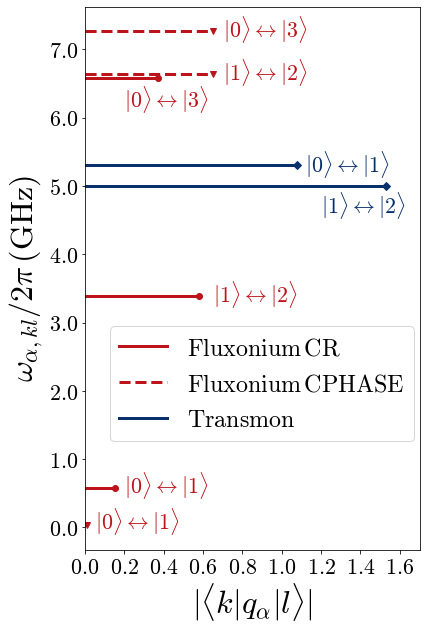

In [7]:
plot_mat_elem(flx_data, transm_data, save=True)

In [5]:
def plot_wave_function(
    wf_cr: dict,
    wf_cphase: dict,
    opt={'fs': 32, 'lw': 3.0, 'ls': 22, 'fsl':22},
    save=False
):
    colors = ["black", "darkorange", "blueviolet", "darkgreen", "magenta"]
    phi = np.array(wf_cr["phi"])
    fig, ax = plt.subplots(2, figsize=(6, 10))
    levels = [0, 1, 2, 3]
    styles = ["--", "--", "--", "--"]
    ax[0].plot(phi/np.pi, np.array(wf_cr["potential"]), color=colors[0], linewidth=opt["lw"], linestyle="-")
    ax[1].plot(phi/np.pi, np.array(wf_cphase["potential"]), color=colors[0], linewidth=opt["lw"], linestyle="-")
    for lev in levels:
        ax[0].plot(phi/np.pi, np.array(wf_cr["energy"][lev]) + 2*np.array(wf_cr["wave_func"][lev]), 
                   linewidth=opt["lw"], linestyle=styles[lev], color=colors[lev + 1])
        ax[0].axhline(y=np.array(wf_cr["energy"][lev]), linestyle=":", color=colors[lev + 1])
        ax[1].plot(phi/np.pi, np.array(wf_cphase["energy"][lev]) + 2*np.array(wf_cphase["wave_func"][lev]), 
                   linewidth=opt["lw"], linestyle=styles[lev], color=colors[lev + 1])
        ax[1].axhline(y=np.array(wf_cphase["energy"][lev]), linestyle=":", color=colors[lev + 1])
    ax[1].set_xlabel('$\\phi_f/\pi$', fontsize=opt["fs"])
    ax[0].set_ylabel('$\\mathrm{Energy}\, (\\mathrm{GHz})$', fontsize=opt["fs"])
    ax[1].set_ylabel('$\\mathrm{Energy}\, (\\mathrm{GHz})$', fontsize=opt["fs"])
    x_ticks = [-1.5 + 0.5*x for x in range(7)]
    x_ticks_latex = ['$-1.5$', '$-1.0$', '$-0.5$', '$0.0$', '$0.5$', '$1.0$', '$1.5$']
    y_ticks_cr = [2.0*y for y in range(6)]
    y_ticks_cr_latex = ['$0.0$', '$2.0$', '$4.0$', '$6.0$', '$8.0$', '$10.0$'] 
    ax[0].set_xticks(x_ticks)
    ax[0].set_xticklabels(x_ticks_latex)
    ax[0].set_yticks(y_ticks_cr)
    ax[0].set_yticklabels(y_ticks_cr_latex)
    ax[0].tick_params(axis='both', labelsize=opt["ls"])
    ax[0].text(-0.7, 10.5, "$\mathrm{Fluxonium \,CR}$", fontsize=opt["fsl"])
    y_ticks_cphase = [-6.0 + 2.0*y for y in range(9)]
    y_ticks_cphase_latex = ['$-6.0$', '$-4.0$', '$-2.0$', '$0.0$', '$2.0$', '$4.0$', '$6.0$', '$8.0$', '$10.0$'] 
    ax[1].set_xticks(x_ticks)
    ax[1].set_xticklabels(x_ticks_latex)
    ax[1].set_yticks(y_ticks_cphase)
    ax[1].set_yticklabels(y_ticks_cphase_latex)
    ax[1].tick_params(axis='both', labelsize=opt["ls"])
    ax[1].text(-1.0, 8.5, "$\mathrm{Fluxonium \, CPHASE}$", fontsize=opt["fsl"])
    if save:
        plt.savefig("wf.svg", dpi=300,  
                    bbox_inches='tight', 
                    transparent=True,
                    pad_inches=0)
    plt.show()
    
    

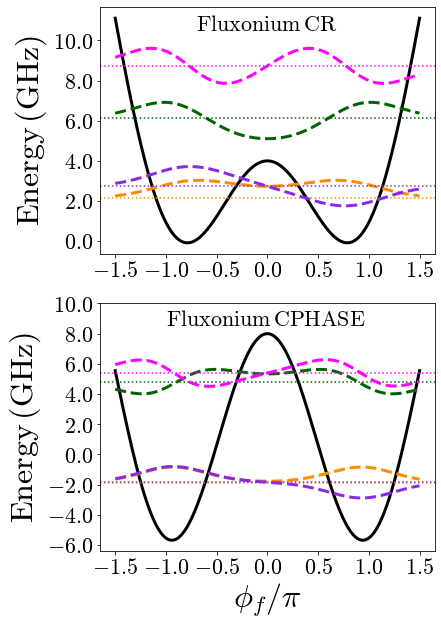

In [8]:
plot_wave_function(wf_cr, wf_cphase, save=True)